# CAPTCHA BREAK 



1.   **EDA**
2.   [MODEL](https://colab.research.google.com/drive/1laexYjo3btLeev4wA4y8_UGkFbpn92lB?usp=sharing)
3.   [EVAL](https://colab.research.google.com/drive/1BxBKW6NsCKV53hMai4xfQqzJtNquWfOx?usp=sharing)
4.   [USAGE]()

---




In [ ]:
!ls "/content/drive/My Drive/LAMFO/Convolutional Neural Network/captcha_break"

 DeathByCaptcha					    LettersScrambled
'Estudo Tratamento Reconhecimento de Imagem.gdoc'   SolvedCaptchas
 LettersCaptchas				    SolvedDBC


In [ ]:
import os
os.chdir('/content/drive/My Drive/LAMFO/Convolutional Neural Network/captcha_break')
os.getcwd()

'/content/drive/.shortcut-targets-by-id/111/captcha_break'

In [ ]:
import numpy as np
import cv2
from imutils import paths
import os.path
from six.moves import cPickle as pickle # para salvar arquivos

## Dados Armazenados em Formato Pickle



1.   Os Captchas importados estão em escala de cinza com dimensão 60x200 e estão com os pixels normalizados $\frac{x_{i}-\bar{x}}{\sigma} $.
2.   As letras importadas posssuem as mesmas propriedades dos captchas com dimensão 40x40



|            Nome           |      Fonte      |  Qtd  | Captchas | Letras |
|:-------------------------:|:---------------:|:-----:|:--------:|:------:|
| SolvedCaptchas            | SolvedCaptchas  | 1.936 |     x    |        |
| SolvedCaptchas_Raw        | SolvedCaptchas  |  607  |     x    |        |
| DeathByCaptcha            | DeathByCaptcha  | 9.432 |     x    |        |
| LettersCaptchas           | LettersCaptchas | 5.256 |          |    x   |
| LettersCaptchas_Fixed     | LettersCaptchas | 9.635 |          |    x   |
| LettersCaptchas_Fixed_Raw | LettersCaptchas | 2.990 |          |    x   |



---





<a id='SolvedCaptchas_Raw'></a>
### Importando 600 Captchas completos RAW

In [ ]:
# Loop and add files to list.
data = []
labels = []
i = 0
captchas = paths.list_images('SolvedCaptchas')
for file in captchas:
    size = os.path.getsize(file)
    name = file.split('/')[1][:-4]
    i += 1
       
    # if len(name) == 5: # Pego somente imagens raw e corretas
    if size > 4000 and len(name) == 5: # Pego somente imagens raw e corretas
       img = cv2.imread(file) 
       img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
       img = (img - img.mean()) / img.std() # Normalizacao da Imagem

       data.append(img)
       labels.append(name)
       if i%150 == 0: print(str(i)+"\t -----> image read: "+name)

    # if i == 10: break

data = np.array(data)
labels = np.array(labels)

150	 -----> image read: BQMSK
300	 -----> image read: YMJZZ
450	 -----> image read: SLJHH
900	 -----> image read: XOHKC


In [ ]:
# salva os dados para uso posterior
data_dir = '/content/drive/My Drive/Colab Notebooks/Data_Colab/Captcha_Break/'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

with open(data_dir+'SolvedCaptchas_Raw_'+'_Data' +'.pickle', 'wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

with open(data_dir+'SolvedCaptchas_Raw_'+'_Labels'+'.pickle', 'wb') as f:
    pickle.dump(labels, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
data.shape, labels.shape

((607, 60, 200), (607,))

### Importando 1900 Captchas completos Resolvidos


In [ ]:
# Loop and add files to list.
data = []
labels = []
shapes = []
i = 0
captchas = paths.list_images('SolvedCaptchas')
for file in captchas:
    size = os.path.getsize(file)
    name = file.split('/')[1][:-4]
    i += 1
       
    if len(name) == 5: # Pego somente imagens corretas
       img = cv2.imread(file) 
       img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
       img = (img - img.mean()) / img.std() # Normalizacao da Imagem
       shape = img.shape

       img = cv2.resize(img, (200, 60))

       shapes.append(shape)
       data.append(img)
       labels.append(name)
       if i%300 == 0: print(str(i)+"\t -----> image read: "+name)

    # if i == 10: break

shapes = np.array(shapes)
data = np.array(data)
labels = np.array(labels)

300	 -----> image read: YMJZZ
600	 -----> image read: SHZBZ
900	 -----> image read: XOHKC
1200	 -----> image read: DNYVD
1500	 -----> image read: XTJEU
1800	 -----> image read: OJODG


In [ ]:
np.unique(shapes,return_counts=True)

(array([ 60, 100, 200, 240]), array([ 607, 1329,  607, 1329]))

In [ ]:
# salva os dados para uso posterior
data_dir = '/content/drive/My Drive/Colab Notebooks/Data_Colab/Captcha_Break/'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

with open(data_dir+'SolvedCaptchas'+'_Data' +'.pickle', 'wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

with open(data_dir+'SolvedCaptchas'+'_Shapes' +'.pickle', 'wb') as f:
    pickle.dump(shapes, f, pickle.HIGHEST_PROTOCOL)

with open(data_dir+'SolvedCaptchas'+'_Labels'+'.pickle', 'wb') as f:
    pickle.dump(labels, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
data.shape, labels.shape

((1936, 60, 200), (1936,))

### Importando Captchas completos Sem Solução


In [ ]:
# Loop and add files to list.
data = []
img_name = []
shapes = []
i = 0
captchas = paths.list_images('DeathByCaptcha')
for file in captchas:
    size = os.path.getsize(file)
    name = file.split('/')[1][:-4]
    i += 1
       
    img = cv2.imread(file) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = (img - img.mean()) / img.std() # Normalizacao da Imagem
    shape = img.shape

    img = cv2.resize(img, (200, 60))

    shapes.append(shape)
    data.append(img)
    img_name.append(name)
    if i%900 == 0: print(str(i)+"\t -----> image read: "+name)

    # if i == 10: break

shapes = np.array(shapes)
data = np.array(data)
img_name = np.array(img_name)

300	 -----> image read: captcha9840
600	 -----> image read: captcha9221
900	 -----> image read: captcha9521
1200	 -----> image read: captcha8901
1500	 -----> image read: captcha8281
1800	 -----> image read: captcha8581
2100	 -----> image read: captcha7961
2400	 -----> image read: captcha7341
2700	 -----> image read: captcha7641
3000	 -----> image read: captcha7021
3300	 -----> image read: captcha6401
3600	 -----> image read: captcha6701
3900	 -----> image read: captcha6081
4200	 -----> image read: captcha5462
4500	 -----> image read: captcha5761
4800	 -----> image read: captcha5142
5100	 -----> image read: captcha4523 (1)
5400	 -----> image read: captcha4822
5700	 -----> image read: captcha4203
6000	 -----> image read: captcha3583
6300	 -----> image read: captcha3883
6600	 -----> image read: captcha3263
6900	 -----> image read: captcha2643
7200	 -----> image read: captcha2943
7500	 -----> image read: captcha2323
7800	 -----> image read: captcha2623
8100	 -----> image read: captcha2003


True

In [ ]:
compara = []
for i in range(data.shape[0]):
    igual = (data[4,:,:] == data[i,:,:]).all()
    compara.append(igual)

compara

In [ ]:
# salva os dados para uso posterior
data_dir = '/content/drive/My Drive/Colab Notebooks/Data_Colab/Captcha_Break/'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

with open(data_dir+'DeathByCaptcha'+'_Data' +'.pickle', 'wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

# with open(data_dir+'SolvedCaptchas'+'_Shapes' +'.pickle', 'wb') as f:
#     pickle.dump(shapes, f, pickle.HIGHEST_PROTOCOL)

# with open(data_dir+'SolvedCaptchas'+'_Labels'+'.pickle', 'wb') as f:
#     pickle.dump(labels, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
data.shape

(9432, 60, 200)

In [ ]:
from six.moves import cPickle as pickle # para salvar arquivos
#Lendo os arquivos
data_dir = '/content/drive/My Drive/Colab Notebooks/Data_Colab/Captcha_Break/'
with open(data_dir+'DeathByCaptcha'+'_Data' +'.pickle', 'rb') as f:
    data = pickle.load(f)


In [ ]:
import os
os.chdir('/content/drive/My Drive/LAMFO/Convolutional Neural Network/captcha_break')
os.getcwd()

'/content/drive/.shortcut-targets-by-id/271/captcha_break'

In [ ]:
import cv2

# image = cv2.imread('DeathByCaptcha/captcha3.png')  # shape: (60,200,3) 
image = cv2.imread('SolvedCaptchas/EOQYL.png')  # shape: (60,200,3) 

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # shape: (60,200,1)
gray = (gray - gray.mean()) / gray.std() # Normalizacao da Imagem
gray = cv2.resize(gray, (200, 60))
gray.shape

(60, 200)

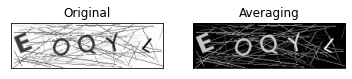

In [ ]:
from matplotlib import pyplot as plt
plt.subplot(121),plt.imshow(image, cmap='binary'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gray, cmap='binary'),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
(data[0,:,:] == data[0,:,:]).all()

In [ ]:
compara = []
for i in range(data.shape[0]):
    igual = (gray == data[i,:,:]).all()
    # igual = (data[44,:,:] == data[i,:,:]).all()
    compara.append(igual)

compara = np.array(compara)
compara.sum()

0

In [ ]:
compara.sum()

0

In [ ]:
data.shape

### Letras Data_Capthca

In [ ]:
# creating empty lists for storing image data and labels
%time
letter_folder = 'LettersCaptchas'

data = []
labels = []
shapes = []
i = 0
for image in paths.list_images(letter_folder):
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    shape = img.shape

    img = cv2.resize(img, (40, 40))

    # adding a 3rd dimension to the image
    img = np.expand_dims(img, axis=2)

    # grabing the name of the letter based on the folder it is present in
    label = image.split(os.path.sep)[-2]

    # appending to the empty lists
    shapes.append(shape)
    data.append(img)
    labels.append(label)
    i += 1
    if i%500 == 0: print(str(i)+"\t -----> image read: "+label)
    # if i > 50: break

# converting data and labels to np array
shapes = np.array(shape)
data = np.array(data, dtype="float")
labels = np.array(labels)

# scaling the values of data between 0 and 1
data = data / 255.0


In [ ]:
# salva os dados para uso posterior
data_dir = '/content/drive/My Drive/Colab Notebooks/Data_Colab/Captcha_Break/'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

with open(data_dir+'LettersCaptchas'+'_Data' +'.pickle', 'wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

with open(data_dir+'LettersCaptchas'+'_Shapes' +'.pickle', 'wb') as f:
    pickle.dump(shapes, f, pickle.HIGHEST_PROTOCOL)

with open(data_dir+'LettersCaptchas'+'_Labels'+'.pickle', 'wb') as f:
    pickle.dump(labels, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
data.shape, labels.shape, np.array(shapes).shape

((5256, 40, 40, 1), (5256,), (5256, 2))

In [ ]:
#Lendo os arquivos
data_dir = '/content/drive/My Drive/Colab Notebooks/Data_Colab/Captcha_Break/'
with open(data_dir+'LettersCaptchas'+'_Data' +'.pickle', 'rb') as f:
    data = pickle.load(f)

with open(data_dir+'LettersCaptchas'+'_Shapes' +'.pickle', 'rb') as f:
    shapes = pickle.load(f)

with open(data_dir+'LettersCaptchas'+'_Labels'+'.pickle', 'rb') as f:
    labels = pickle.load(f)

In [ ]:
import matplotlib.pyplot as plt
def plot_images(images, cls_true, shapes, cmap='binary'):
    fig, axes = plt.subplots(3, 5, figsize=(7,7))
    fig.subplots_adjust(hspace=0.1, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap=cmap)   # plota a imagem
        true_label = cls_true[i]
        dim = str(shapes[i])
        xlabel = true_label + ' ' + dim
        
        # mostra a previsão embaixo (x-axis)
        ax.set_xlabel(xlabel, color='black', fontsize=10)
        ax.set_xticks([]), ax.set_yticks([])

    plt.show()   

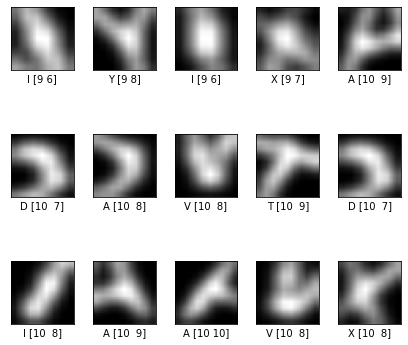

In [ ]:
i = 10
seq = np.argsort(shapes[:,0])[i:(i+15)]
plot_images(data[seq,:,:,0], labels[seq], shapes[seq])

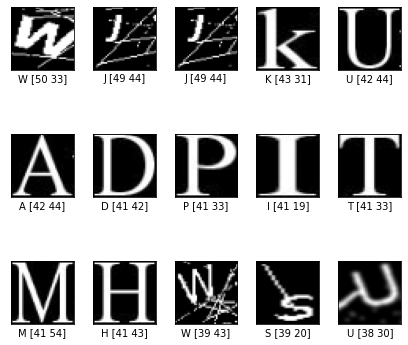

In [ ]:
i = 1
seq = np.argsort(shapes[:,0], )[::-1][i:(i+15)]
plot_images(data[seq,:,:,0], labels[seq], shapes[seq])

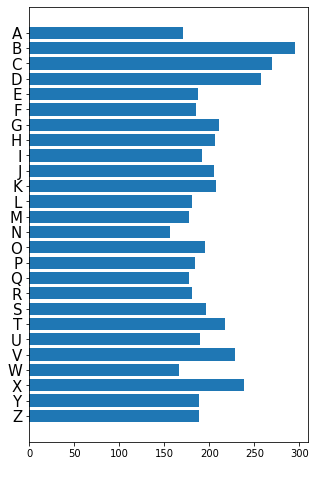

In [ ]:
letr, freq  = np.unique(labels,return_counts=True)
y_pos = np.arange(len(letr))
fig, ax = plt.subplots(figsize=(5,8))
ax.barh(y_pos, freq)
ax.set_yticks(y_pos)
ax.set_yticklabels(letr, color='black', fontsize=15)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Freq', color='white')

plt.show()

### Letras com Regiões Fixas


In [ ]:
#Lendo os captchas completos
%%time
data_dir = '/content/drive/My Drive/Colab Notebooks/Data_Colab/Captcha_Break/'
with open(data_dir+'SolvedCaptchas'+'_Data' +'.pickle', 'rb') as f:
    data = pickle.load(f)

with open(data_dir+'SolvedCaptchas'+'_Labels'+'.pickle', 'rb') as f:
    labels = pickle.load(f)

CPU times: user 33.9 ms, sys: 485 ms, total: 519 ms
Wall time: 3.53 s


In [ ]:
letras_y = np.array([list(x) for x in labels])
np.unique(letras_y,return_counts=True)

(array(['0', '4', '6', '7', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I',
        'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
        'W', 'X', 'Y', 'Z'], dtype='<U1'),
 array([  1,   3,   1,   4, 376, 391, 352, 365, 389, 366, 381, 370, 359,
        349, 371, 380, 359, 354, 347, 385, 396, 367, 393, 365, 355, 378,
        348, 415, 357, 403]))

In [ ]:
filtro = np.char.isnumeric(letras_y).sum(1)==0  # Filtro de Caracteres numericos
data = data[filtro]
labels = labels[filtro]

letras_y = np.array([list(x) for x in labels])
pos_y = np.array([np.where(x) for x in letras_y]).reshape((9635,1))
letras_y = letras_y.reshape((9635,1))
captcha_y = np.repeat(labels, 5, axis=0)

np.unique(letras_y,return_counts=True)

(array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
        'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
       dtype='<U1'),
 array([375, 389, 351, 365, 387, 366, 379, 369, 358, 346, 369, 377, 357,
        352, 346, 384, 395, 367, 391, 362, 354, 376, 347, 415, 356, 402]))

In [ ]:
import cv2
letras_x = []
for img in data:
    i = 0
    for x in range(5):
        # Extrai as 5 letras da imagem
        letras_x.append(cv2.resize(img[:, (x*40 - i) : ((x+1)*40 + i)],(40,40)) )
        i = 8

letras_x = np.array(letras_x)
letras_x = np.expand_dims(letras_x, axis=3)

In [ ]:
letras_x.shape, letras_y.shape, pos_y.shape, captcha_y.shape

((9635, 40, 40, 1), (9635, 1), (9635, 1), (9635,))

In [ ]:
import matplotlib.pyplot as plt
# define a função  para desenhar 9 imagens
def plot_images(images, cls_true, pos,  cmap='binary'):
    fig, axes = plt.subplots(3, 5, figsize=(7,7))
    fig.subplots_adjust(hspace=0.4, wspace=0.05)

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap=cmap)   # plota a imagem
        true_label = cls_true[i]
        posicao = str(pos[i])
        
        xlabel = ' '.join(true_label) + '-' + ''.join(posicao)
        
        # mostra a previsão embaixo (x-axis)
        ax.set_xlabel(xlabel, color='black', fontsize=20)
        ax.set_xticks([]), ax.set_yticks([])

    plt.show()   

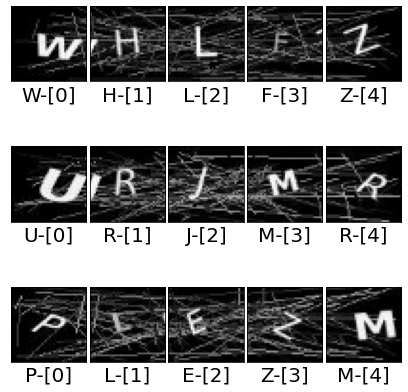

In [ ]:
i, qtd = 0, 15
plot_images(letras_x[i:(i+qtd),:,:,0], letras_y[i:(i+qtd)], pos_y[i:(i+qtd)] )

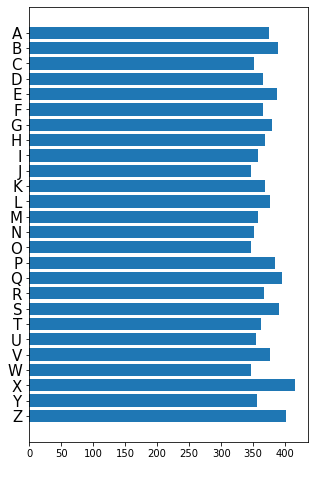

In [ ]:
letr, freq  = np.unique(letras_y,return_counts=True)
y_pos = np.arange(len(letr))
fig, ax = plt.subplots(figsize=(5,8))
ax.barh(y_pos, freq)
ax.set_yticks(y_pos)
ax.set_yticklabels(letr, color='black', fontsize=15)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Freq', color='white')

plt.show()

In [ ]:
# salva os dados para uso posterior
data_dir = '/content/drive/My Drive/Colab Notebooks/Data_Colab/Captcha_Break/'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

with open(data_dir+'LettersCaptchas_Fixed'+'_Data' +'.pickle', 'wb') as f:
    pickle.dump(letras_x, f, pickle.HIGHEST_PROTOCOL)

with open(data_dir+'LettersCaptchas_Fixed'+'_Labels'+'.pickle', 'wb') as f:
    pickle.dump(letras_y, f, pickle.HIGHEST_PROTOCOL)

with open(data_dir+'LettersCaptchas_Fixed'+'_Positions'+'.pickle', 'wb') as f:
    pickle.dump(pos_y, f, pickle.HIGHEST_PROTOCOL)

with open(data_dir+'LettersCaptchas_Fixed'+'_Captchas'+'.pickle', 'wb') as f:
    pickle.dump(captcha_y, f, pickle.HIGHEST_PROTOCOL)

### Letras com Regiões Fixas - 600


In [ ]:
#Lendo os captchas completos
%%time
data_dir = '/content/drive/My Drive/Colab Notebooks/Data_Colab/Captcha_Break/'
with open(data_dir+'SolvedCaptchas_Raw_'+'_Data' +'.pickle', 'rb') as f:
    data = pickle.load(f)

with open(data_dir+'SolvedCaptchas_Raw_'+'_Labels'+'.pickle', 'rb') as f:
    labels = pickle.load(f)
    
data.shape, labels.shape

CPU times: user 9.2 ms, sys: 43.7 ms, total: 52.9 ms
Wall time: 115 ms


In [ ]:
letras_y = np.array([list(x) for x in labels])
np.unique(letras_y,return_counts=True)

(array(['0', '4', '6', '7', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I',
        'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
        'W', 'X', 'Y', 'Z'], dtype='<U1'),
 array([  1,   3,   1,   4, 134, 117, 118, 117, 115, 122, 110, 108, 106,
        104, 103, 132, 106, 120, 112, 125, 116, 129, 119, 101, 112, 122,
        106, 126, 112, 134]))

In [ ]:
filtro = np.char.isnumeric(letras_y).sum(1)==0  # Filtro de Caracteres numericos
data = data[filtro]
labels = labels[filtro]

letras_y = np.array([list(x) for x in labels])
pos_y = np.array([np.where(x) for x in letras_y]).reshape((2990 ,1))
letras_y = letras_y.reshape((2990 ,1))
captcha_y = np.repeat(labels, 5, axis=0)

np.unique(letras_y,return_counts=True)

(array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
        'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
       dtype='<U1'),
 array([133, 115, 117, 117, 113, 122, 108, 107, 105, 101, 101, 129, 104,
        118, 111, 124, 115, 129, 117,  98, 111, 120, 105, 126, 111, 133]))

In [ ]:
import cv2
letras_x = []
for img in data:
    i = 0
    for x in range(5):
        # Extrai as 5 letras da imagem
        letras_x.append(cv2.resize(img[:, (x*40 - i) : ((x+1)*40 + i)],(40,40)) )
        i = 8

letras_x = np.array(letras_x)
letras_x = np.expand_dims(letras_x, axis=3)

In [ ]:
letras_x.shape, letras_y.shape, pos_y.shape, captcha_y.shape

((2990, 40, 40, 1), (2990, 1), (2990, 1), (2990,))

In [ ]:
# salva os dados para uso posterior
data_dir = '/content/drive/My Drive/Colab Notebooks/Data_Colab/Captcha_Break/'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

with open(data_dir+'LettersCaptchas_Fixed_Raw'+'_Data' +'.pickle', 'wb') as f:
    pickle.dump(letras_x, f, pickle.HIGHEST_PROTOCOL)

with open(data_dir+'LettersCaptchas_Fixed_Raw'+'_Labels'+'.pickle', 'wb') as f:
    pickle.dump(letras_y, f, pickle.HIGHEST_PROTOCOL)

with open(data_dir+'LettersCaptchas_Fixed_Raw'+'_Positions'+'.pickle', 'wb') as f:
    pickle.dump(pos_y, f, pickle.HIGHEST_PROTOCOL)

with open(data_dir+'LettersCaptchas_Fixed_Raw'+'_Captchas'+'.pickle', 'wb') as f:
    pickle.dump(captcha_y, f, pickle.HIGHEST_PROTOCOL)

(40, 40)

TypeError: ignored

In [ ]:
(train_x, val_x, train_y, val_y, shape_x, shape_y) = train_test_split(data, labels, shapes, test_size=0.3, random_state=13)

In [ ]:
erro = 0
for i in range(len(val_y)):
    
    if lb.inverse_transform(predict)[i] != lb.inverse_transform(val_y)[i]:
        erro += 1
        # print('Erro:', erro)
        # print('\nO valor predito foi:', lb.inverse_transform(predict)[i],
        #       '\nBaseado no valor observado (label):', lb.inverse_transform(val_y)[i],
        #       '\nOriundo da imagem:', val_file[i][0:1]+'\\'+val_file[i][1:]+'.png')
        # display(Image.open('C:\\imagens\\LettersCaptchas'+'\\'+val_file[i][0:1]+'\\'+val_file[i][1:]+'.png'))
        # print('----------')

array([[1.03156980e-16, 9.09680948e-23, 1.28034125e-17, ...,
        1.16143561e-18, 2.06604312e-23, 3.03855569e-21],
       [3.54523212e-03, 8.08287784e-03, 3.33407283e-04, ...,
        4.80511645e-03, 5.93829236e-06, 7.89008263e-05],
       [1.14332027e-17, 3.54573388e-07, 1.76497645e-16, ...,
        3.33286640e-18, 2.13558392e-13, 3.50329859e-20],
       ...,
       [5.23797181e-16, 1.04641548e-21, 1.00569250e-18, ...,
        9.99997616e-01, 2.43879140e-06, 1.20460935e-14],
       [2.10951157e-06, 1.97436452e-06, 1.80856114e-06, ...,
        2.26567736e-05, 3.26757319e-04, 3.32911071e-07],
       [3.15445107e-15, 6.97669918e-07, 5.09633351e-13, ...,
        1.40783581e-19, 1.10041305e-18, 4.81860075e-20]], dtype=float32)

In [ ]:
print()
print()
print('Quantidade de Erros:', erro)
print('Quantidade de Acertos:', len(val_y) - erro)
print('Total (Base de Testes):', len(val_y))




Quantidade de Erros: 88
Quantidade de Acertos: 1489
Total (Base de Testes): 1577
